# [Dacon 공모전] 전화 해지 여부 분류

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, KFold, StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

# Data Load
- target : 전화해지여부

In [3]:
train = pd.read_csv("./train.csv")
test=pd.read_csv("./test.csv")

In [4]:
train.head()

ID  가입일  음성사서함이용  주간통화시간  주간통화횟수  주간통화요금  저녁통화시간  저녁통화횟수  저녁통화요금  \
0  TRAIN_00000  329        0    99.2      93    27.3   268.8      68   28.92   
1  TRAIN_00001    2       80   323.9     323    83.7   269.4     326   32.09   
2  TRAIN_00002   93       28   282.4     323    34.2   207.0     322   32.82   
3  TRAIN_00003  223        1   221.4     223    25.1   233.0      61   23.90   
4  TRAIN_00004  222        0    96.3     222    28.7   223.9      69   28.08   

   밤통화시간  밤통화횟수  밤통화요금  상담전화건수  전화해지여부  
0  262.9    328  32.89       2       0  
1  322.8    209  32.32       2       0  
2  280.8    328   8.28       0       0  
3  203.8    234   9.36       0       0  
4  263.1    223   2.80       8       0

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


In [31]:
train2=train.drop('ID',axis=1)

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12943 entries, 0 to 12942
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       12943 non-null  object 
 1   가입일      12943 non-null  int64  
 2   음성사서함이용  12943 non-null  int64  
 3   주간통화시간   12943 non-null  float64
 4   주간통화횟수   12943 non-null  int64  
 5   주간통화요금   12943 non-null  float64
 6   저녁통화시간   12943 non-null  float64
 7   저녁통화횟수   12943 non-null  int64  
 8   저녁통화요금   12943 non-null  float64
 9   밤통화시간    12943 non-null  float64
 10  밤통화횟수    12943 non-null  int64  
 11  밤통화요금    12943 non-null  float64
 12  상담전화건수   12943 non-null  int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 1.3+ MB


# EDA

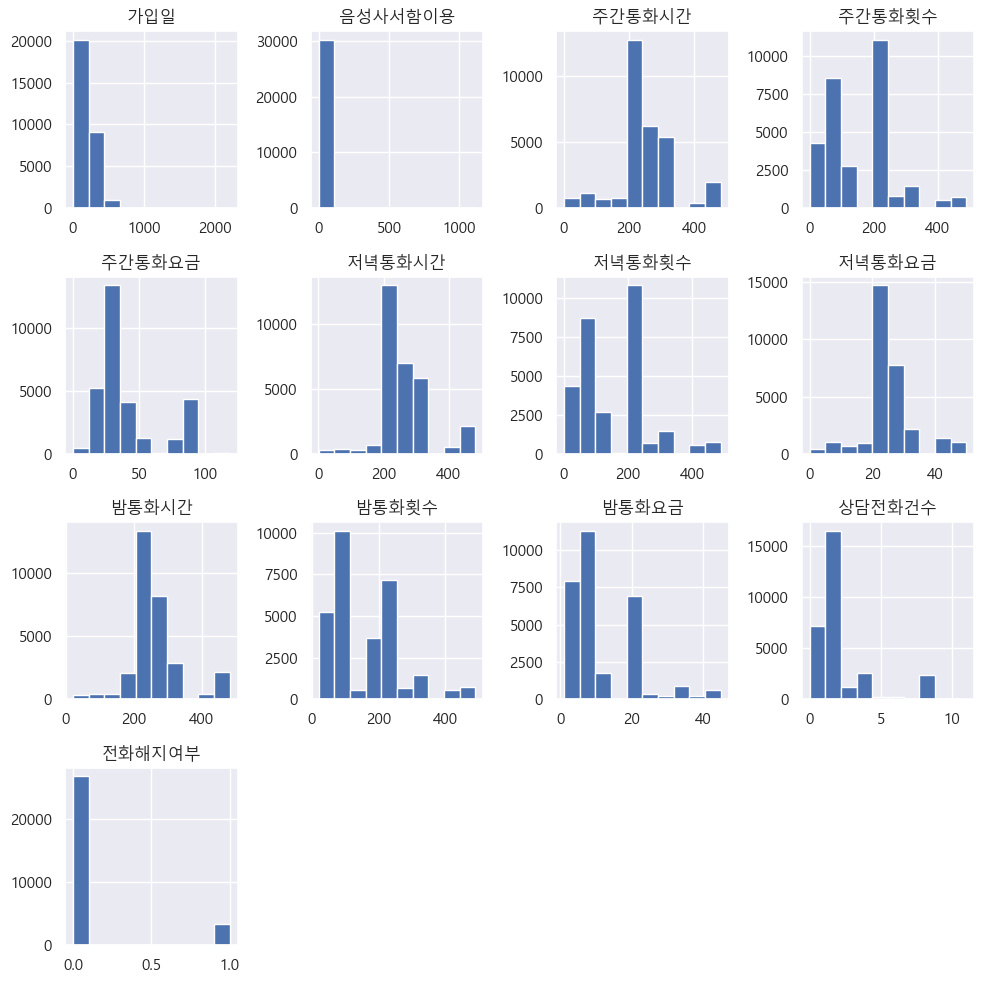

In [11]:
train.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

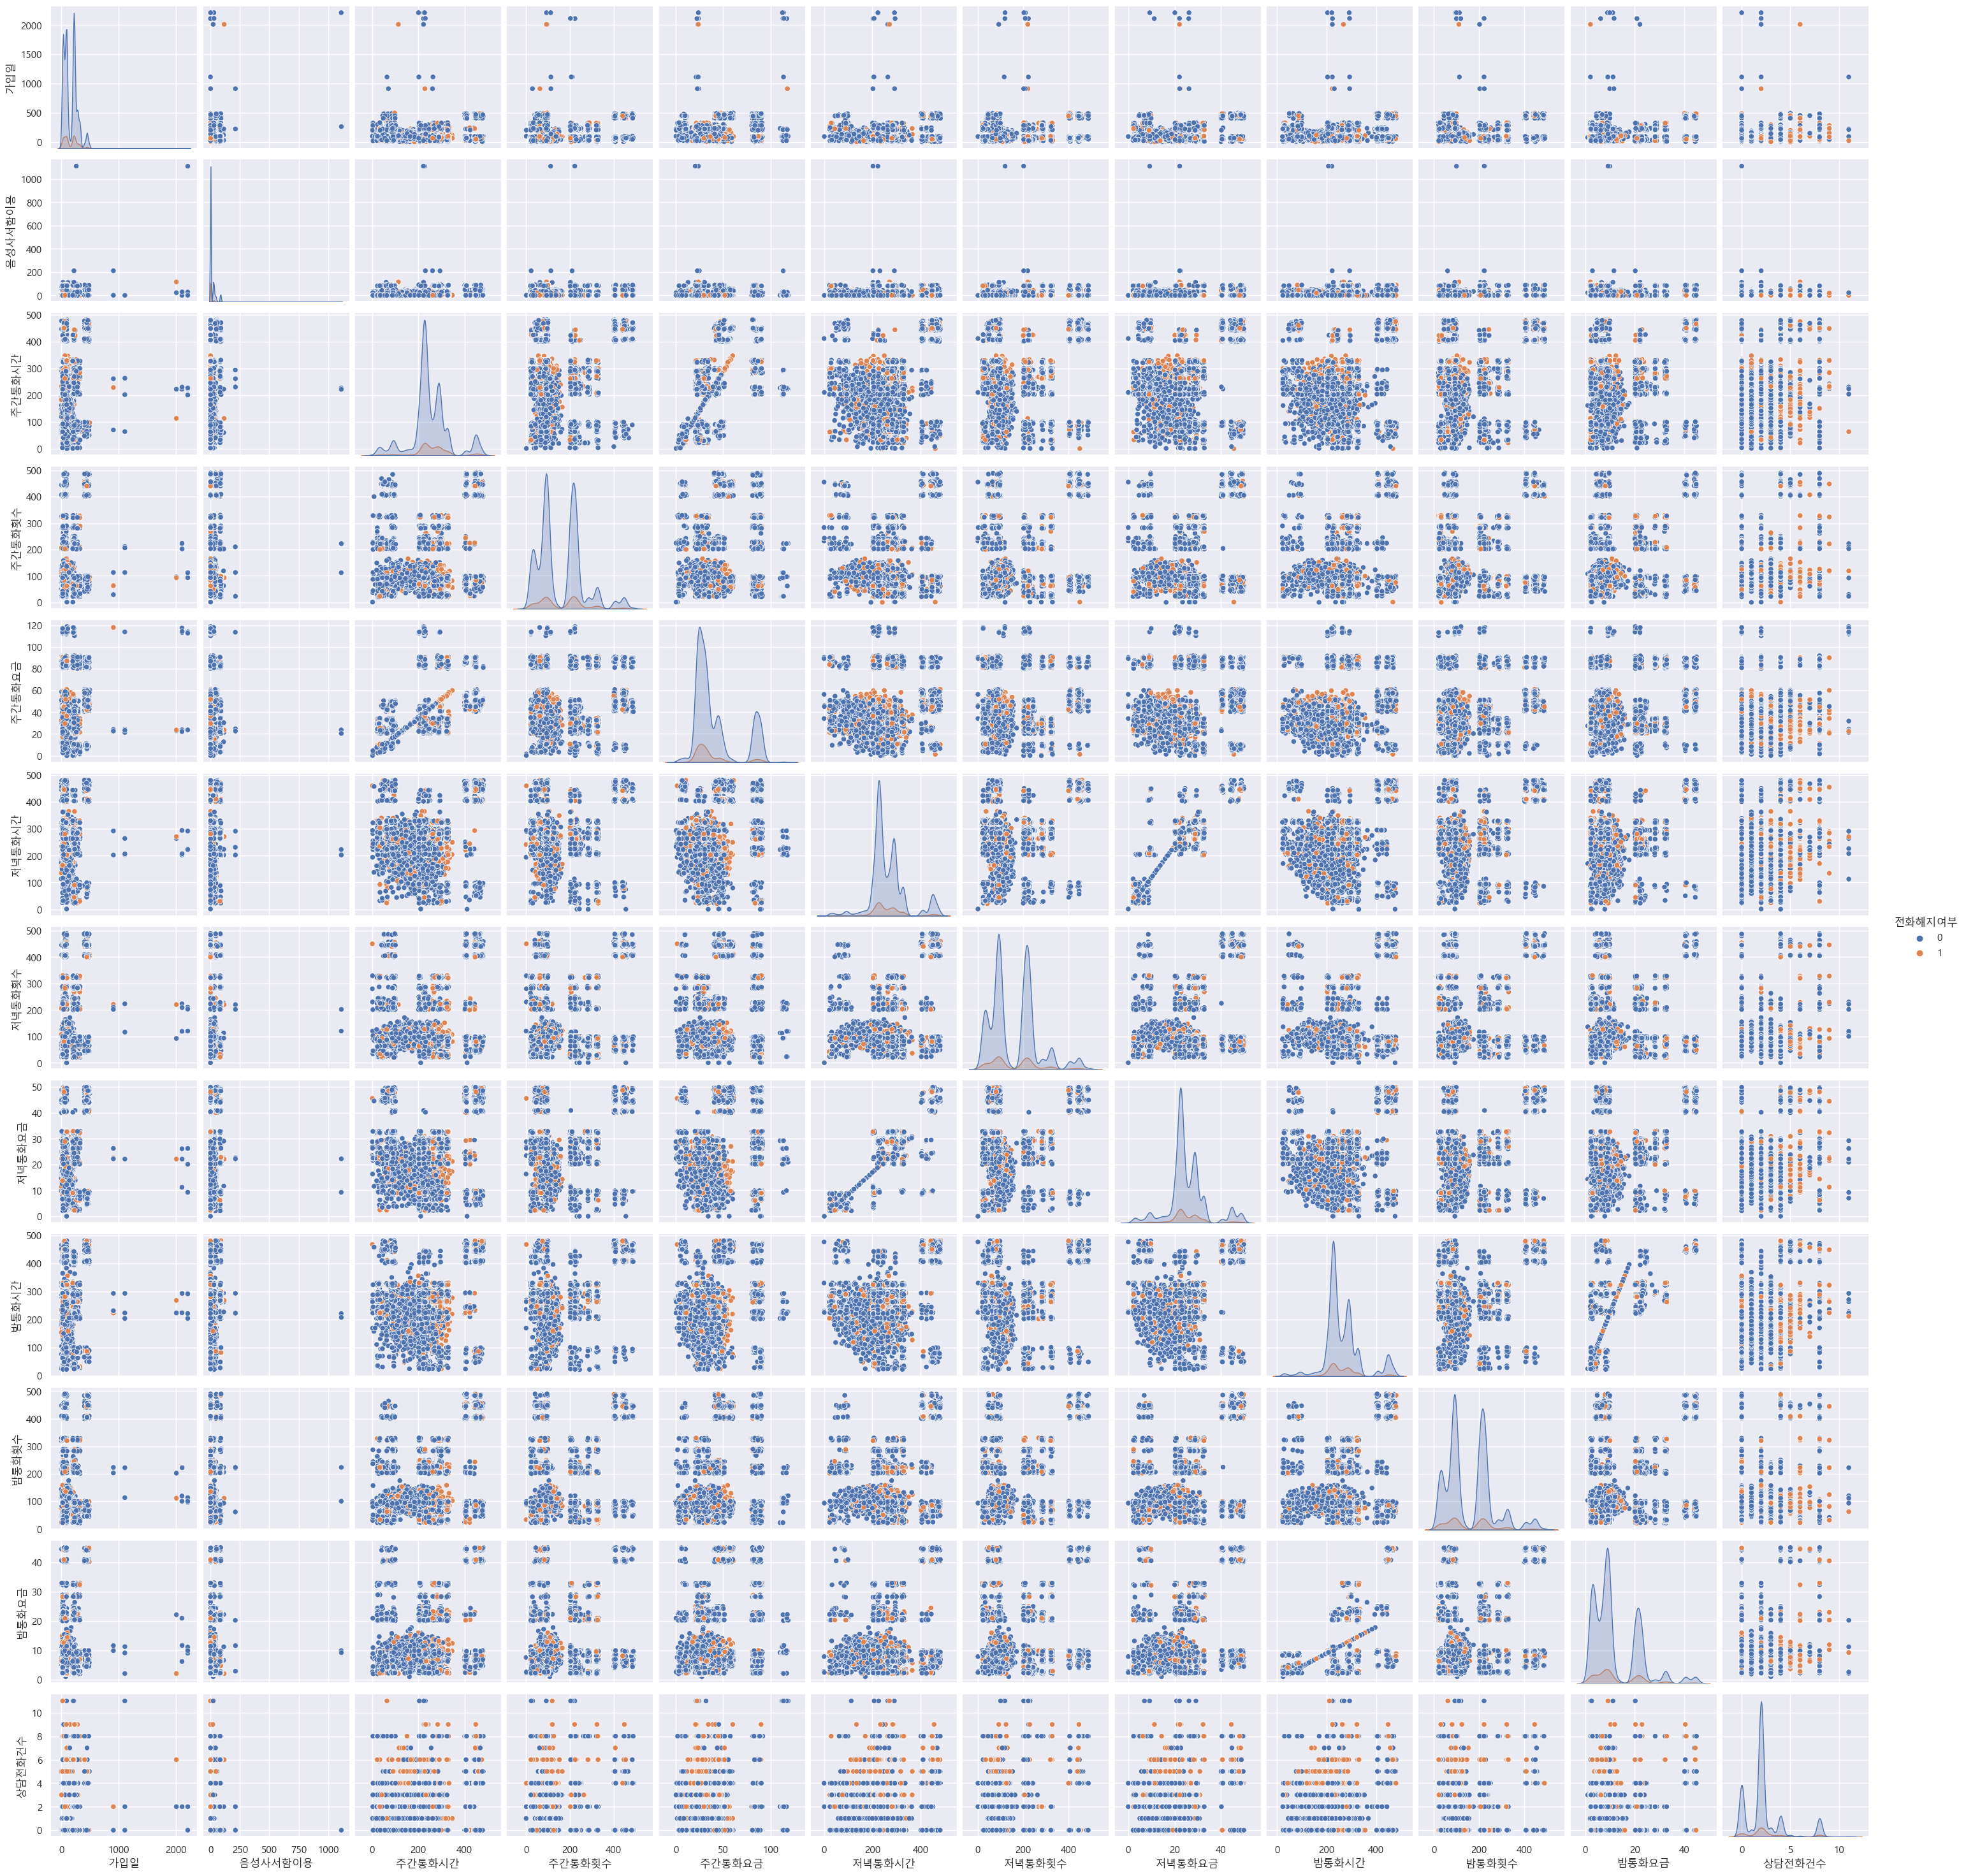

In [16]:
sns.pairplot(data=train , hue='전화해지여부')
plt.show()

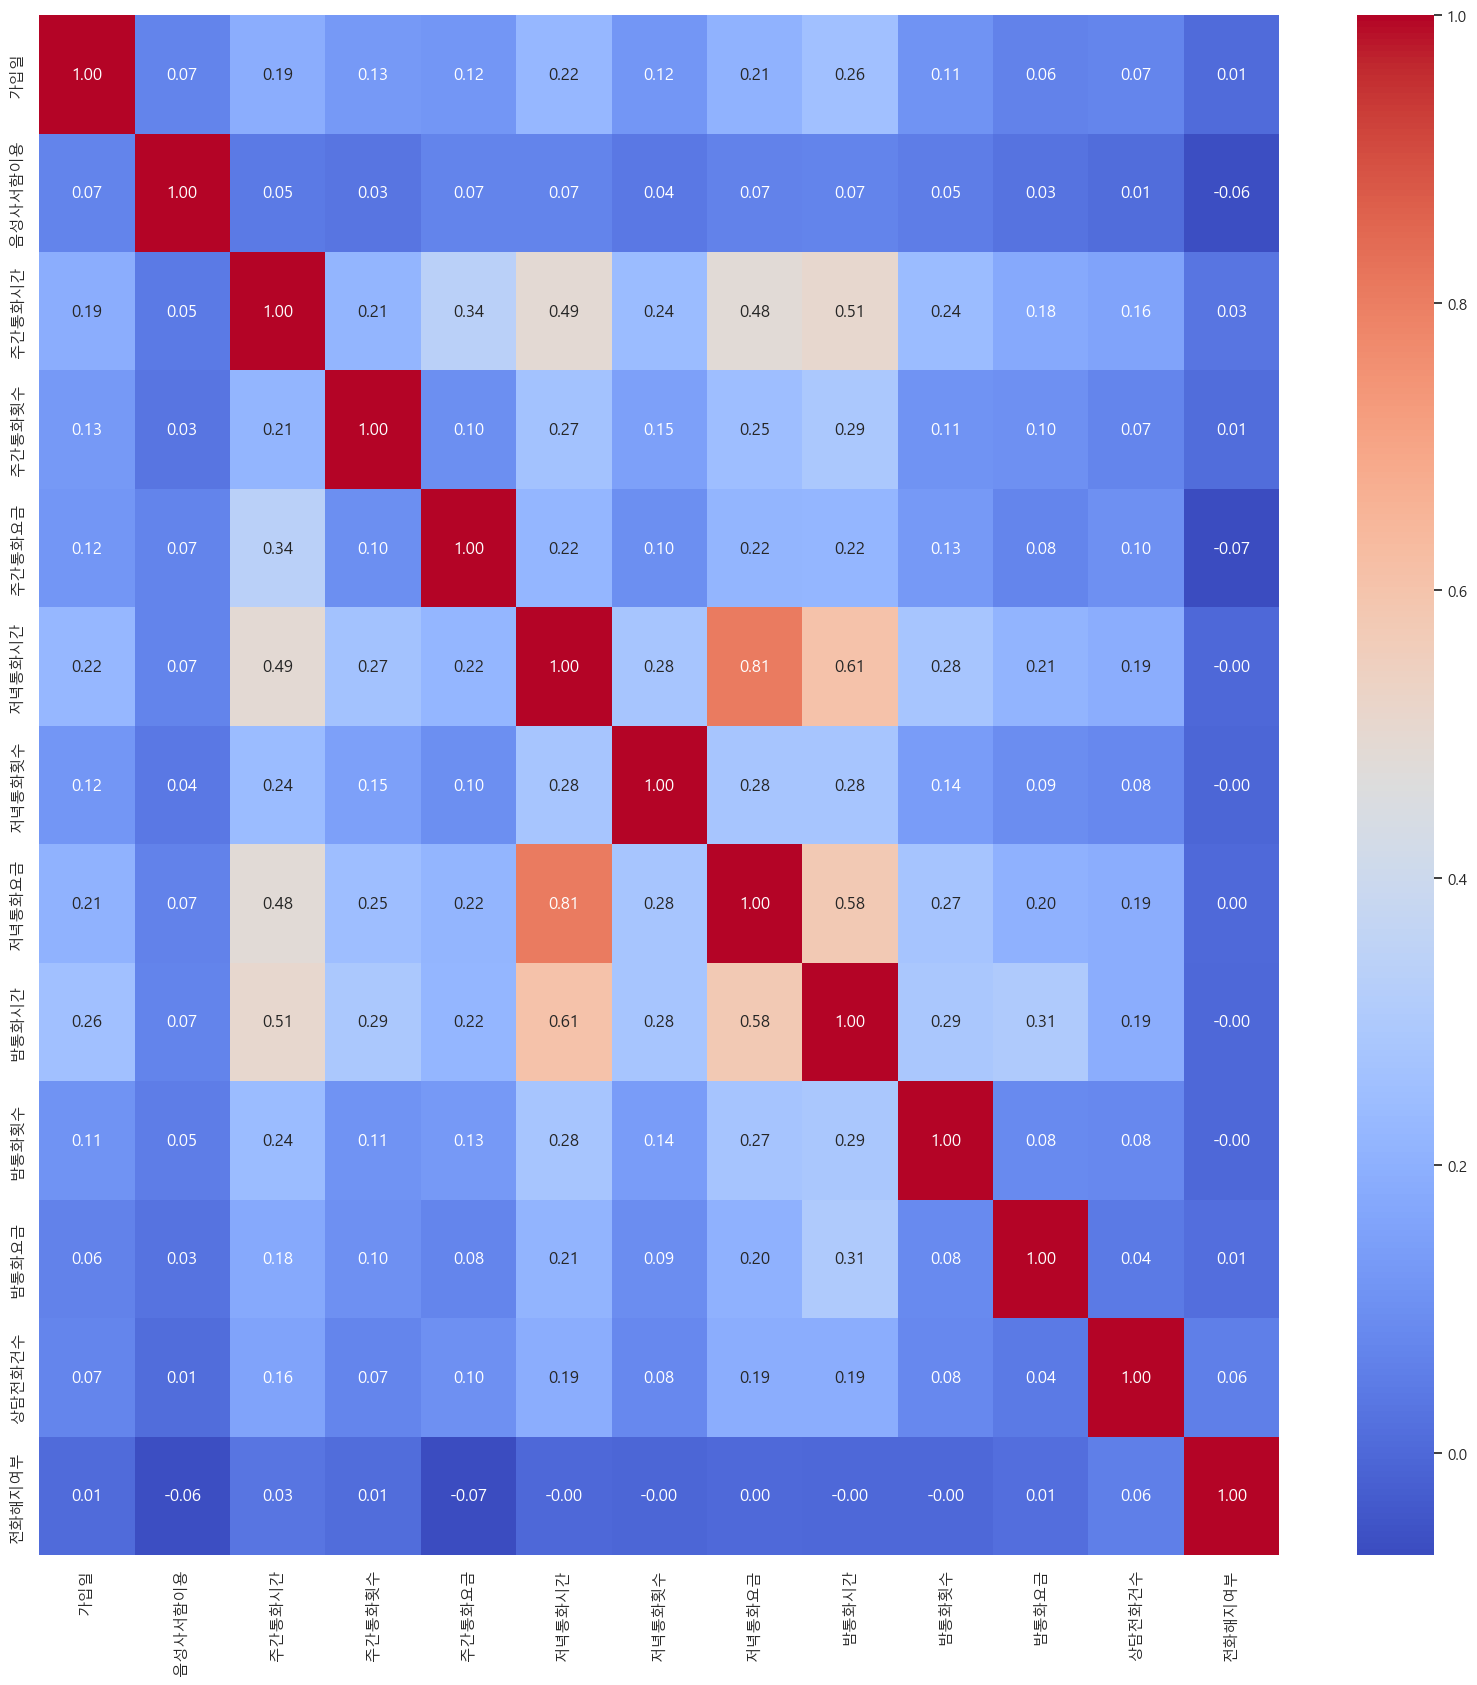

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr() ,annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [18]:
train.columns

Index(['ID', '가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '주간통화요금', '저녁통화시간',
       '저녁통화횟수', '저녁통화요금', '밤통화시간', '밤통화횟수', '밤통화요금', '상담전화건수', '전화해지여부'],
      dtype='object')

In [17]:
train['전화해지여부'].value_counts()

0    26882
1     3318
Name: 전화해지여부, dtype: int64

In [ ]:
dfdfdfdf

In [41]:
y = train2['전화해지여부']
X = train2.drop(['전화해지여부'], axis=1)

X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.2)
model = RandomForestClassifier(random_state=11)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(  confusion_matrix(y_test,  pred)   )
print(f"정확도: {accuracy_score(y_test, pred):.4f}, 정밀도: {precision_score(y_test, pred):.4f}, 재현율: {recall_score(y_test, pred):.4f}, F1: {f1_score(y_test, pred):.4f}")

[[5336   89]
 [ 364  251]]
정확도: 0.9250, 정밀도: 0.7382, 재현율: 0.4081, F1: 0.5257


In [44]:
test=test.drop('ID',axis=1)

In [45]:
pred = model.predict(test)

In [51]:
sub=pd.read_csv('sample_submission.csv')
sub['전화해지여부']=pred
sub.to_csv('submit1.csv',index=False)

In [52]:
sub.head()

ID  전화해지여부
0  TEST_00000       0
1  TEST_00001       0
2  TEST_00002       0
3  TEST_00003       0
4  TEST_00004       1